In [25]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

import datetime

import statsmodels.tsa.api as smt

# Load and View Data

In [39]:
# date,store,item,sales | original data
# date:date, store:store, sales:sales | my dataset
def load_data():  
    # return pd.read_csv('../data/train.csv')  
    return pd.read_csv('../data/trainWallmart.csv')  

sales_data = load_data()

In [40]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328074 entries, 0 to 328073
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   date                      328074 non-null  int64  
 1   SHOP_WEEKDAY              328074 non-null  int64  
 2   SHOP_HOUR                 328074 non-null  int64  
 3   sales                     328074 non-null  int64  
 4   SPEND                     328074 non-null  float64
 5   item                      328074 non-null  object 
 6   CUST_LIFESTAGE            228994 non-null  object 
 7   BASKET_ID                 328074 non-null  int64  
 8   BASKET_SIZE               328074 non-null  object 
 9   BASKET_PRICE_SENSITIVITY  328074 non-null  object 
 10  BASKET_DOMINANT_MISSION   328074 non-null  object 
 11  store                     328074 non-null  object 
 12  STORE_FORMAT              328074 non-null  object 
 13  STORE_REGION              328074 non-null  o

In [41]:
sales_data.head()

,date,SHOP_WEEKDAY,SHOP_HOUR,sales,SPEND,item,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_DOMINANT_MISSION,store,STORE_FORMAT,STORE_REGION
0,20060410,2,14,3,3.03,PRD0900005,NaN,994100100191892,L,LA,Grocery,STORE00015,LS,E02
1,20060410,2,14,1,1.01,PRD0900005,OT,994100100208819,L,MM,Fresh,STORE00015,LS,E02
2,20060413,5,21,1,1.01,PRD0900005,OA,994100100234420,L,MM,Mixed,STORE00015,LS,E02
3,20060411,3,13,1,1.01,PRD0900005,NaN,994100100336132,L,LA,Mixed,STORE00015,LS,E02
4,20060411,3,19,3,3.03,PRD0900005,OT,994100100361771,L,LA,Mixed,STORE00015,LS,E02


In [42]:
def daily_sales(data):
    # monthly_data = data.copy()
    # monthly_data.date = monthly_data.date.apply(lambda x: str(x)[:-3])
    # monthly_data = monthly_data.groupby('date')['sales'].sum().reset_index()
    # monthly_data.date = pd.to_datetime(monthly_data.date)

    # modified
    daily_data = data.copy()
    daily_data.date = daily_data.date.apply(lambda x: "".join([str(x)[:4], "-", str(x)[4:6],"-", str(x)[6:8]]))
    # daily_data.sales = daily_data.sales.apply(lambda x: x)
    print(daily_data.date)
    daily_data = daily_data.groupby('date')['sales'].sum().reset_index()
    daily_data.date = pd.to_datetime(daily_data.date)
    # data.to_csv('data/daily_data_modified.csv')
    # return data
    return daily_data

In [43]:
# monthly_df = daily_sales(sales_data)
# monthly_df.head()
daily_df = daily_sales(sales_data)
daily_df.head()

0         2006-04-10
1         2006-04-10
2         2006-04-13
3         2006-04-11
4         2006-04-11
             ...    
328069    2006-07-04
328070    2006-07-09
328071    2006-07-06
328072    2006-07-09
328073    2006-07-03
Name: date, Length: 328074, dtype: object


,date,sales
0,2006-04-10,4865
1,2006-04-11,4707
2,2006-04-12,5015
3,2006-04-13,4924
4,2006-04-14,5014


# EDA

In [46]:
# Duration of dataset
# def sales_duration(data):
#     # data.date = pd.to_datetime(data.date)
#     data.date = pd.to_datetime(arg=data.date, format='%Y-%m-%d')
#     # number_of_days = data.date.max() - data.date.min()
#     # number_of_years = number_of_days.days / 365
#     # print(number_of_days.days, 'days')
#     # print(number_of_years, 'years')

# sales_duration(sales_data)

# sales_data.head()


adfasdfasdfasd
1970-01-01 00:00:00.020060709


,date,SHOP_WEEKDAY,SHOP_HOUR,sales,SPEND,item,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_DOMINANT_MISSION,store,STORE_FORMAT,STORE_REGION
0,1970-01-01 00:00:00.020060410,2,14,3,3.03,PRD0900005,NaN,994100100191892,L,LA,Grocery,STORE00015,LS,E02
1,1970-01-01 00:00:00.020060410,2,14,1,1.01,PRD0900005,OT,994100100208819,L,MM,Fresh,STORE00015,LS,E02
2,1970-01-01 00:00:00.020060413,5,21,1,1.01,PRD0900005,OA,994100100234420,L,MM,Mixed,STORE00015,LS,E02
3,1970-01-01 00:00:00.020060411,3,13,1,1.01,PRD0900005,NaN,994100100336132,L,LA,Mixed,STORE00015,LS,E02
4,1970-01-01 00:00:00.020060411,3,19,3,3.03,PRD0900005,OT,994100100361771,L,LA,Mixed,STORE00015,LS,E02


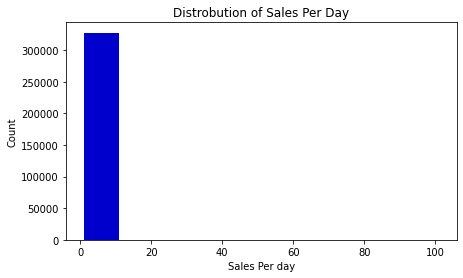

In [47]:
def sales_per_day():
    fig, ax = plt.subplots(figsize=(7,4))
    plt.hist(sales_data.sales, color='mediumblue')
    
    ax.set(xlabel = "Sales Per day",
           ylabel = "Count",
           title = "Distrobution of Sales Per Day")
    
sales_per_day()

c:\Users\MahmoodThe3rd\anaconda3\envs\py39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


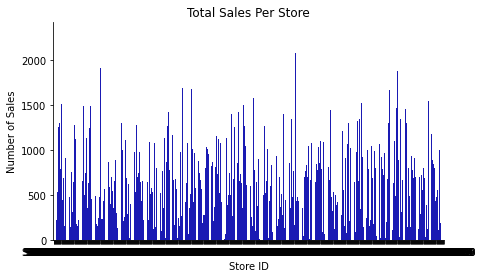

In [48]:
def sales_per_store():
    by_store = sales_data.groupby('store')['sales'].sum().reset_index()
    
    fig, ax = plt.subplots(figsize=(7,4))
    sns.barplot(by_store.store, by_store.sales, color='mediumblue')
    
    ax.set(xlabel = "Store ID",
           ylabel = "Number of Sales",
           title = "Total Sales Per Store")
    
    sns.despine()
    
sales_per_store()

In [49]:
# Average monthly sales

# Overall
avg_monthly_sales = monthly_df.sales.mean()
print(f"Overall average monthly sales: ${avg_monthly_sales}")

# Last 12 months (this will be the forecasted sales)
avg_monthly_sales_12month = monthly_df.sales[-12:].mean()
print(f"Last 12 months average monthly sales: ${avg_monthly_sales_12month}")

Overall average monthly sales: $5445.9010989010985
Last 12 months average monthly sales: $5603.916666666667


# Determining Stationarity

In [50]:
def time_plot(data, x_col, y_col, title):
    fig, ax = plt.subplots(figsize=(15,5))
    sns.lineplot(x_col, y_col, data=data, ax=ax, color='mediumblue', label='Total Sales')
    
    second = data.groupby(data.date.dt.year)[y_col].mean().reset_index()
    second.date = pd.to_datetime(second.date, format='%Y')
    sns.lineplot((second.date + datetime.timedelta(6*365/12)), y_col, data=second, ax=ax, color='red', label='Mean Sales')   
    
    ax.set(xlabel = "Date",
           ylabel = "Sales",
           title = title)
    
    sns.despine()

c:\Users\MahmoodThe3rd\anaconda3\envs\py39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\MahmoodThe3rd\anaconda3\envs\py39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


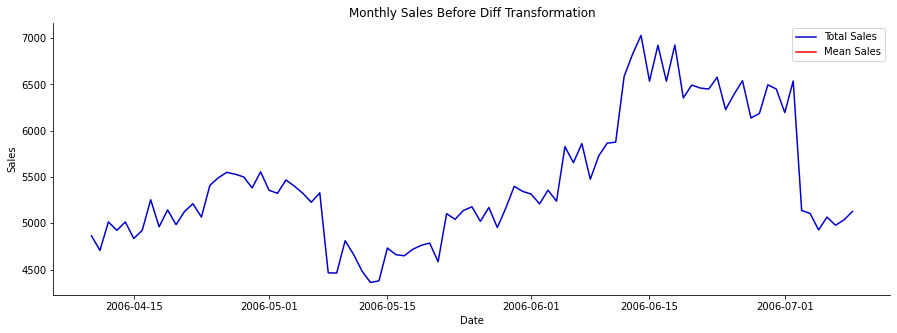

In [51]:
time_plot(monthly_df, 'date', 'sales', 'Monthly Sales Before Diff Transformation')

In [52]:
def get_diff(data):
    data['sales_diff'] = data.sales.diff()
    data = data.dropna()
    
    data.to_csv('../data/stationary_df.csv')
    return data

In [53]:
stationary_df = get_diff(monthly_df)

c:\Users\MahmoodThe3rd\anaconda3\envs\py39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\MahmoodThe3rd\anaconda3\envs\py39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


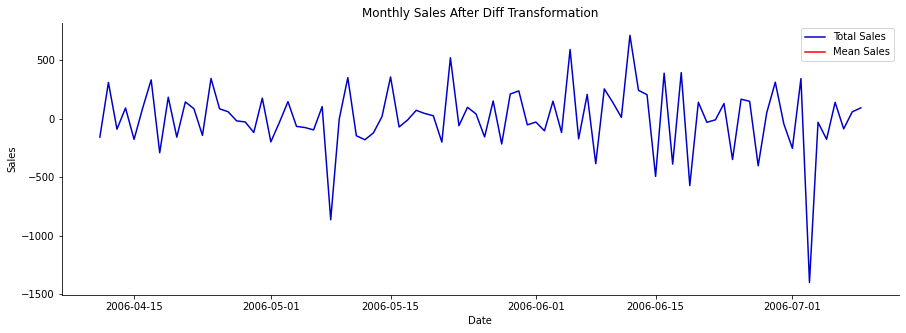

In [54]:
time_plot(stationary_df, 'date', 'sales_diff', 'Monthly Sales After Diff Transformation')

# Observing Lags

c:\Users\MahmoodThe3rd\anaconda3\envs\py39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


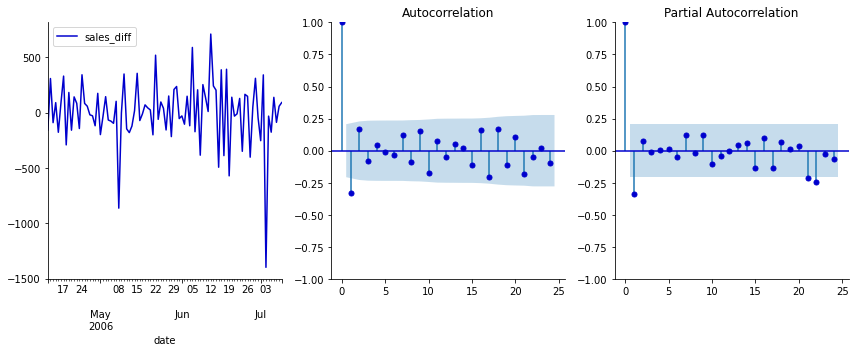

In [55]:
def plots(data, lags=None):
    
    # Convert dataframe to datetime index
    dt_data = data.set_index('date').drop('sales', axis=1)
    dt_data.dropna(axis=0)
    
    layout = (1, 3)
    raw  = plt.subplot2grid(layout, (0, 0))
    acf  = plt.subplot2grid(layout, (0, 1))
    pacf = plt.subplot2grid(layout, (0, 2))
    
    dt_data.plot(ax=raw, figsize=(12, 5), color='mediumblue')
    smt.graphics.plot_acf(dt_data, lags=lags, ax=acf, color='mediumblue')
    smt.graphics.plot_pacf(dt_data, lags=lags, ax=pacf, color='mediumblue')
    sns.despine()
    plt.tight_layout()

plots(stationary_df, lags=24);

# Preparing Dataset Modeling

## Regressive Modeling

In [56]:
#create dataframe for transformation from time series to supervised
def generate_supervised(data):
    supervised_df = data.copy()
    
    #create column for each lag
    for i in range(1,13):
        col_name = 'lag_' + str(i)
        supervised_df[col_name] = supervised_df['sales_diff'].shift(i)
    
    #drop null values
    supervised_df = supervised_df.dropna().reset_index(drop=True)
    
    supervised_df.to_csv('../data/model_df.csv', index=False)
    
    return supervised_df

In [57]:
model_df = generate_supervised(stationary_df)

In [58]:
model_df

,date,sales,sales_diff,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
0,2006-04-23,5067,-144.0,84.0,142.0,-159.0,182.0,-292.0,330.0,88.0,-178.0,90.0,-91.0,308.0,-158.0
1,2006-04-24,5409,342.0,-144.0,84.0,142.0,-159.0,182.0,-292.0,330.0,88.0,-178.0,90.0,-91.0,308.0
2,2006-04-25,5492,83.0,342.0,-144.0,84.0,142.0,-159.0,182.0,-292.0,330.0,88.0,-178.0,90.0,-91.0
3,2006-04-26,5550,58.0,83.0,342.0,-144.0,84.0,142.0,-159.0,182.0,-292.0,330.0,88.0,-178.0,90.0
4,2006-04-27,5530,-20.0,58.0,83.0,342.0,-144.0,84.0,142.0,-159.0,182.0,-292.0,330.0,88.0,-178.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2006-07-05,4929,-177.0,-32.0,-1399.0,341.0,-254.0,-46.0,310.0,49.0,-403.0,147.0,165.0,-350.0,128.0
74,2006-07-06,5067,138.0,-177.0,-32.0,-1399.0,341.0,-254.0,-46.0,310.0,49.0,-403.0,147.0,165.0,-350.0
75,2006-07-07,4979,-88.0,138.0,-177.0,-32.0,-1399.0,341.0,-254.0,-46.0,310.0,49.0,-403.0,147.0,165.0
76,2006-07-08,5036,57.0,-88.0,138.0,-177.0,-32.0,-1399.0,341.0,-254.0,-46.0,310.0,49.0,-403.0,147.0


## ARIMA Modeling

In [59]:
def generate_arima_data(data):
    dt_data = data.set_index('date').drop('sales', axis=1)
    dt_data.dropna(axis=0)
    
    dt_data.to_csv('../data/arima_df.csv')
    
    return dt_data

In [60]:
datetime_df = generate_arima_data(stationary_df)

In [61]:
datetime_df

,sales_diff
date,
2006-04-11,-158.0
2006-04-12,308.0
2006-04-13,-91.0
2006-04-14,90.0
2006-04-15,-178.0
...,...
2006-07-05,-177.0
2006-07-06,138.0
2006-07-07,-88.0
